# GLMs part 2: the generic GLM framework, exponential families, and statistical inference

## Overview

As we saw in the previous section on logistic regression, there are many situations where we would like to understand the relationship between a response variable $y$ and other observed variables $\boldsymbol{x}$, but where the assumption that $y$ is normal (the typical assumption for regular linear regression) is not appropriate. Generalized linear models (GLMs) give us flexibility to model $y$ as following other distributions. 

For example, in logistic regression, our response $y$ was binary, and it was natural to model its distribution (conditional on $\boldsymbol{x}$) as $\text{Bernoulli}(p)$, where 

$$
p = P(y=1\mid X=\boldsymbol{x}) = \mathbb{E}[y\mid X=\boldsymbol{x}].
$$

Since $\mathbb{E}[y\mid X=\boldsymbol{x}]$ is a probability between 0 and 1, it does not make sense to model $\mathbb{E}[y\mid X=\boldsymbol{x}]$ as a linear function of $\boldsymbol{x}$ directly, but rather as the function 

$$
\mathbb{E}[y\mid X=\boldsymbol{x}] =P(y=1\mid X=\boldsymbol{x},\boldsymbol{\beta}) = \frac{1}{1+e^{-\boldsymbol{\beta}\cdot \boldsymbol{x}}} 
$$

Rearranging this equation, we get that

$$
g(p) = \log\left(\frac{p}{1-p}\right) = \boldsymbol{\beta}\cdot \boldsymbol{x}
$$

so that _some function_ (denoted $g$) of the conditional mean $p=\mathbb{E}[y\mid X=\boldsymbol{x}]$ is a linear combination of our data. The function $g$ here is called the _link function_. We require that the link function has a few properties:

1. $g$ must be invertible, which is equivalent to assuming that it is monotone (so that we can compute $g^{-1}(\boldsymbol{\beta}\cdot\boldsymbol{x})$ to get back $\mathbb{E}[y\mid X=\boldsymbol{x}]$)
2. $g$ must be differentiable

By choosing different link functions with these properties, we can model a variety of types of data. In general, a GLM is any model for the response $y \mid X=\boldsymbol{x}$ such that there exists a link function $g$ satisfying

$$
g(\mathbb{E}[y\mid X=\boldsymbol{x}]) = \boldsymbol{\beta}\cdot \boldsymbol{x}.
$$

So far we've seen two examples:

- linear regression, where $y\mid X=\boldsymbol{x} \sim N(\mu, \sigma^2)$ and $g(z) = z$
- logistic regression, where $y\mid X=\boldsymbol{x} \sim \text{Bernoulli}(p)$ and $g(z) = \log\frac{z}{1-z}$

In the next section, we will see that we can derive a wide variety of different GLMs, modelling different types of response variables, using a broad family of distributions called _exponential families_.

## Deriving GLMs from exponential families

Consider a random variable $Y$ whose distribution depends on a single parameter $\theta$. This distribution is a member of the exponential families of distributions (in canonical form) if its density can be written in the form

$$
p(y; \theta) = \frac{1}{Z(\theta)}h(y)e^{y\theta}\hspace{10mm} (1)
$$

Here $Z(\theta)$ is a normalizing constant which, from the constraint $\int p(y; \theta) dy = 1$, is always equal to $Z(\theta) = \int h(y)e^{y\theta}dy$.

Many commonly used distributions are exponential familes. Let's see a few examples.

**The normal distribution with fixed variance**. Consider the $N(\mu, 1)$ distribution. It's density is given by

$$
\begin{align*}
p(y; \mu) &= \frac{1}{\sqrt{2\pi}}e^{-(y-\mu)^2/2}\\ 
&= \frac{1}{\sqrt{2\pi}}e^{-y^2/2 + y\mu - \mu^2/2}\\
&= \frac{1}{Z(\theta)}h(y)e^{y\theta}
\end{align*}
$$

where we've set $\theta = \mu$, $h(y) = e^{-y^2/2}$ and $Z(\theta) = \sqrt{2\pi}e^{\theta^2/2}$. 

**The Bernoulli distribution**. Consider the $\text{Bernoulli}(q)$ distribution. It's density can be written as

$$
\begin{align*}
p(y; q) &= \begin{cases} q & y=1\\ 1-q & y=0\end{cases}\\
&= q^{y}(1-q)^{1-y}\\
&= e^{y\log\frac{q}{1-q} + \log(1-q)}\\
&= \frac{1}{Z(\theta)}h(y)e^{y\theta}
\end{align*}
$$

where we've set $\theta = \log\frac{q}{1-q}$, $h(y) = 1$, and $Z(\theta) = 1+e^{\theta}$.

**The Poisson distribution**. Consider the $\text{Poisson}(\lambda)$ distribution. It's density can be written as

$$
\begin{align*}
p(y; \lambda) &= \frac{\lambda^{y}e^{-\lambda}}{y!}\\ 
&= e^{y\log \lambda - \log y! - \lambda}\\
&= \frac{1}{Z(\theta)}h(y)e^{y\theta} 
\end{align*}
$$

where we've set $\theta = \log \lambda$, $h(y) = \frac{1}{y!}$, and $Z(\theta) = e^{e^{\theta}}$. (Bit weird, this one!)

There are also plenty of generalizations of exponential families, e.g. to multi-parameter distributions, though for simplicity, we will stick to the one-parameter case.

There are a number of clever and convenient mathematical facts about exponential distribution. The first one which we shall use is the following identity, which holds whenever $Y\sim p(y;\theta)$ for some exponential family of the form $(1)$:

$$
\frac{d}{d\theta} \log Z(\theta) = \mathbb{E}[Y]
$$

It's straightforward enough to show why this is true. We have

$$
\begin{align*}
\frac{d}{d\theta} \log Z(\theta) &= \frac{d}{d\theta}\log \int h(y)e^{y\theta}dy\\
&= \frac{\int \frac{d}{d\theta} h(y)e^{y\theta}dy}{\int h(y)e^{y\theta}dy}\\
&=\frac{1}{Z(\theta)}\int y h(y)e^{y\theta}dy\\
&= \int y p(y;\theta)dy = \mathbb{E}[Y].
\end{align*}
$$

This is very convenient from the perspective of GLMs! To see why, define $\psi(\theta) = \frac{d}{d\theta}\log Z(\theta)$. Then if $\psi$ is invertible, we have that

$$
\psi(\theta) = \mathbb{E}[Y] \iff \theta = \psi^{-1}(\mathbb{E}[Y]).
$$

In fact, it turns out that $\psi$ is _always_ invertible for an exponential family (this is another "magical" fact about exponential families). This means that if we want to build a regression model where the response is distributed according to some exponential family, we can automatically use the link function $g = \psi^{-1}$! Moreover, since what we really want to model is the _conditional_ response $Y$ given $X = \boldsymbol{x}$, we can additionally model $\theta$ as a linear function of $\boldsymbol{x}$, i.e. $\theta(\boldsymbol{x}) = \boldsymbol{\beta}\cdot \boldsymbol{x}$, which finally gives us

$$
g(\mathbb{E}[Y\mid X=\boldsymbol{x}]) = \psi^{-1}(\mathbb{E}[Y\mid X=\boldsymbol{x}]) = \boldsymbol{\beta}\cdot \boldsymbol{x}.
$$

Basically, if we work with exponential families we automatically have a way to come up with the link function $g$.

**Bernoulli example continued.** For example, in the Bernoulli example (corresponding to logistic regression), we have that $Z(\theta) = 1+e^{\theta}$ and so

$$
\begin{align*}
\psi(\theta) &= \frac{d}{d\theta} \log Z(\theta) \\
&= \frac{d}{d\theta} \log(1+e^{\theta}) \\
&= \frac{e^\theta}{1+e^{\theta}}.
\end{align*}
$$

Then $g(z) = \psi^{-1}(z) = \log\frac{z}{1-z}$ -- exactly what we got before!

## Fitting GLMs
Like in logistic regression, we can fit GLMs using maximum likelihood estimation. Given samples $n$ samples $(y_i, \boldsymbol{x}_i)_{i=1}^n$ with $y_i\mid \boldsymbol{x}_i$ drawn independently from some exponential family with parameter $\theta_i = \boldsymbol{\beta}\cdot \boldsymbol{x}_i$, the joint likelihood is given by 

$$
\begin{align*}
L(\boldsymbol{\beta}; (y_i,\boldsymbol{x}_i)_{i=1}^n) = \prod_{i=1}^n \frac{1}{Z(\boldsymbol{\beta}\cdot \boldsymbol{x}_i)}h(y_i)e^{y_i \boldsymbol{\beta}\cdot \boldsymbol{x}_i}
\end{align*}
$$

Computing the negative log-likelihood (which we want to minimize), this simplifies to 

$$
\ell(\boldsymbol{\beta})=-\log L(\boldsymbol{\beta}; (y_i,\boldsymbol{x}_i)_{i=1}^n) = \sum_{i=1}^n \left\{\log Z(\boldsymbol{\beta}\cdot\boldsymbol{x}_i) - \log h(y_i) - y_i \boldsymbol{\beta}\cdot \boldsymbol{x}_i\right\}
$$

**Normal example continued.** Let's see that this formula makes sense in the normal case. We have $\log Z(\theta_i) = \frac{1}{2}\log(2\pi) + \theta_i^2/2$, $-\log h(y_i) = y_i^2/2$ and so the formula becomes 

$$
\begin{align*}
\ell(\boldsymbol{\beta}) &= \sum_{i=1}^n \left\{\frac{1}{2}\log(2\pi) + (\boldsymbol{\beta}\cdot \boldsymbol{x}_i)^2/2 + y_i^2/2 - y_i \boldsymbol{\beta}\cdot \boldsymbol{x}_i\right\} \\
&= \frac{n}{2}\log(2\pi) + \frac{1}{2}\sum_{i=1}^n (y_i - \boldsymbol{\beta}\cdot \boldsymbol{x}_i)^2 = \frac{n}{2}\log(2\pi) + \frac{1}{2}\|\boldsymbol{y} - \boldsymbol{X\beta}\|_2^2
\end{align*}
$$

This indeed recovers the negative log-likelihood we saw in the [Gaussian model for linear regression](../basic_linear_regression/maximum_likelihood_estimation.md).

Outside of the normal distribution case, we very rarely will be able to minimize the negative log-likelihood analytically, and instead will need to use computational methods to fit the models (for example, we could use Newton's method like we saw in the previous section). In practice, we can just fit these models using a standard package provided in python or R.

Let's see an example of a problem where the reponse isn't Bernoulli or normally distributed so we can get a taste of what we can do with GLMs. Here will illustrate Poisson regression using the `fishing` dataset, which we load below.

In [1]:
import pandas as pd

dataset = pd.read_csv("datasets/fishing.csv")
dataset.head()

,Unnamed: 0,site,totabund,density,meandepth,year,period,sweptarea
0,1,1,76,0.002070,804,1978,1977-1989,36710.000000
1,2,2,161,0.003520,808,2001,2000-2002,45741.253906
2,3,3,39,0.000981,809,2001,2000-2002,39775.000000
3,4,4,410,0.008039,848,1979,1977-1989,51000.000000
4,5,5,177,0.005933,853,2002,2000-2002,29831.251953


This dataset contains information about the number of fish observed in different sites over various time periods. The variable `totabund` records the number of fish observed in a given site and the variable `meandepth`represents the mean water depth of the sites area, respectively. Let's plot these two variables against each other to get a sense of the relationship.

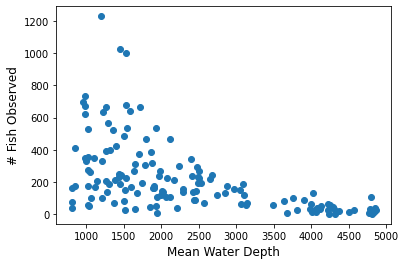

In [2]:
import matplotlib.pyplot as plt 

plt.scatter(dataset["meandepth"], dataset["totabund"])
plt.xlabel("Mean Water Depth", fontsize=12)
plt.ylabel("# Fish Observed", fontsize=12)
plt.show()

We see a general decreasing trend: as water depth increases, fewer fish are observed. Now suppose that the distribution of fish observed given the water depth follows a Poisson distribution, and fit a Poisson regression model to model the relationship between these two values. We do this in the following.

In [3]:
import statsmodels.api as sm 
import numpy as np

# prep the data
X = dataset["meandepth"].to_numpy().reshape(-1,1)
ones = np.ones_like(X)
X = np.hstack([ones, X])
y = dataset["totabund"].to_numpy()

# fit the model using sm.GLM
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  147
Model:                            GLM   Df Residuals:                      145
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8375.2
Date:                Fri, 04 Nov 2022   Deviance:                       15778.
Time:                        00:22:27   Pearson chi2:                 1.67e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6466      0.013    523.960      0.000       6.622       6.671
x1            -0.0006   6.66e-06    -94.741      0.000      -0.001      -0.001
==============================================================================
"""

The coefficient of $-0.0006$ for `meandepth` seems a bit odd -- very low for the slope of the line that we've seen. This is because the Poisson model is actually modelling a transformed version of our data! Recall that for the Poisson model, we had $\boldsymbol{\beta}\cdot \boldsymbol{x}_i = \theta_i = \log \mathbb{E}[y_i \mid \boldsymbol{x}_i]$, so this coefficient really needs to be interpreted on a log scale. To see what the fitted model actually looks like, we can just plot its predictions.

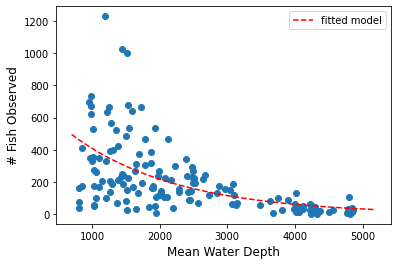

In [4]:
xx = np.linspace(700, 5200, 50).reshape(-1,1)
ones = np.ones_like(xx)
xx = np.hstack([ones, xx])
yy = model.predict(xx)

plt.scatter(dataset["meandepth"], dataset["totabund"])
plt.plot(xx[:,1], yy, color='red', linestyle='--', label="fitted model")
plt.xlabel("Mean Water Depth", fontsize=12)
plt.ylabel("# Fish Observed", fontsize=12)
plt.legend()
plt.show()

Just as a point of comparison, let's see what would have happened if we fit a basic linear regression model to this data, ignoring that the counts aren't actually discrete. To make a fair comparison, we will also transform the response to using a log scale for the OLS regression.

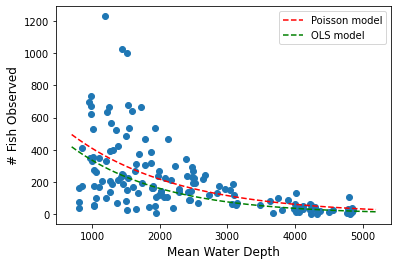

In [5]:
model_ols = sm.OLS(np.log(y), X).fit()
yy_ols = model_ols.predict(xx)

plt.scatter(dataset["meandepth"], dataset["totabund"])
plt.plot(xx[:,1], yy, color='red', linestyle='--', label="Poisson model")
plt.plot(xx[:,1], np.exp(yy_ols), color='green', linestyle='--', label="OLS model")
plt.xlabel("Mean Water Depth", fontsize=12)
plt.ylabel("# Fish Observed", fontsize=12)
plt.legend()
plt.show()

In general, the models perform very similarly, though the Poisson model seems to capture the larger deviations in number of fish observed in shallow water. 

Notice that in the output for the Poisson regression model, there are various $z$ statistics and $p$-values reported. Like in OLS regression, these are statistics for the hypothesis $\beta_j = 0$. In the next section, we explain how these numbers are obtained.

## Statistical inference for GLMs

Recall that for OLS regression using the Gaussian model, we were able to perform statistical inference by exploiting the fact that $\hat{\boldsymbol{\beta}} \sim N(\boldsymbol{\beta}_\star, \sigma^2 (\boldsymbol{X^\top X})^{-1})$. Using this fact, we derived tests for hypothesis of the form $\beta_j = 0$ or $\beta_{1}=\cdots=\beta_p = 0$. Since we are no longer working with the Gaussian mdoel of regression -- which was critical for getting the distribution of $\hat{\boldsymbol{\beta}}$ -- how can we still perform statistical inference like this for GLMs? For example, how did `statsmodels` compute the $p$-values it gave in the output of the Poisson regression mode above?

To perform statistical inference in this setting, we must instead rely on the _asymptotic_ distribution of $\hat{\boldsymbol{\beta}}$, i.e. in the limit when $n\to\infty$. Fortunately, because we perform maximum likelihood estimation to fit $\hat{\boldsymbol{\beta}}$, this asymptotic distribution is easy to find using the following important result.

**Asymptotic normality of the MLE**. Let $\hat{\boldsymbol{\theta}}$ be the maximum likelihood estimator of some parameters $\boldsymbol{\theta}_0$. Then as $n\to \infty$, 

$$
\hat{\boldsymbol{\theta}} \sim N(\boldsymbol{\theta}_0, \boldsymbol{I}_n^{-1}(\boldsymbol{\theta}_0))
$$

where $\boldsymbol{I}_n(\boldsymbol{\theta}_0)$ is the _Fisher information matrix_, which is given by 

$$
\boldsymbol{I}_n(\boldsymbol{\theta}_0) = \mathbb{E}_{\boldsymbol{\theta}_0}[\nabla^2_{\boldsymbol{\theta}}\ell(\boldsymbol{\theta}_0)]
$$

and $\ell$ is the negative log-likelihood, as before.

The Fisher information matrix measures the curvature of the likelihood around the true parameter -- if this curvature is very high, the model contains lots of "information", corresponding to smaller values of $\boldsymbol{I}_n^{-1}$ which will mean lower variance for the MLE. The Fisher information has many interesting and important properties, though these are outside the scope of this section.

We can now apply this result to our GLMs. Since $\hat{\boldsymbol{\beta}}$ is a maximum likelihood estimator (assuming whatever model we've chosen is actually correct), we immediately get that for sufficiently large $n$, $\hat{\boldsymbol{\beta}}$ is approximately distributed as $N(\boldsymbol{\beta}_\star, \boldsymbol{I}_n(\boldsymbol{\beta}_\star))$. The last issue we need to handle to actually use this distribution to perform hypothesis tests is the fact that $\boldsymbol{I}_n(\boldsymbol{\beta}_\star)$ isn't actually known (since we don't know $\boldsymbol{\beta}_\star$). Instead, in practice we often use the plug-in estimator: $\hat{\boldsymbol{I}}_n = \nabla_{\boldsymbol{\beta}}^2 \ell(\hat{\boldsymbol{\beta}})|_{\boldsymbol{\beta}=\hat{\boldsymbol{\beta}}}$. Fortunately, most statistical software can do this the background for us. 

Nonetheless, it is important that we do not simply take these $p$-values without nuance: there are a number of things that we should consider when interpreting these numbers, based on the assumptions that we've made when fitting the model. Do we have enough data for the asymptotic regime to be reasonable? Perhaps even more importantly, is the model assumption we've made (i.e. which exponential family we're modelling our data as following) reasonable for our data? Like always, we must be careful in assessing the validity of our models.